tgb - 11/1/2019 - Making figures for the UW+UCI paper from reduced pkl data

In [1]:
import math

import matplotlib as mpl
import matplotlib.pylab as pl
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from pylab import *

import numpy as np

import pickle

import xarray as xr

# Load uwnet utilities (assumes a local symlink to uwnet utilities)
from uwnet.wave import *
# from uwnet.spectra import *
from uwnet.plots.jacobian import plot

IMPORTANT: Define path to .pkl data and to where .pdf figures are saved below:

In [2]:
pathPKL = '/home1/05823/tg851228/SPCAM/CBRAIN-CAM/notebooks/tbeucler_devlog/PKL_DATA/'
pathPDF = '/home1/05823/tg851228/'

# Figure 9

In [3]:
# Download appropriate data
#!wget -nc https://github.com/tbeucler/CBRAIN-CAM/raw/master/notebooks/tbeucler_devlog/PKL_DATA/9_9_LRF.pkl
!wget -nc https://github.com/tbeucler/CBRAIN-CAM/raw/master/notebooks/tbeucler_devlog/PKL_DATA/9_13_LRF.pkl
!wget -nc https://github.com/tbeucler/CBRAIN-CAM/raw/master/notebooks/tbeucler_devlog/PKL_DATA/9_14_LRF.pkl
#!wget -nc https://github.com/tbeucler/CBRAIN-CAM/raw/master/notebooks/tbeucler_devlog/PKL_DATA/9_20_LRF.pkl

# load
data = np.load('9_13_LRF.pkl', allow_pickle=True) # [0.01,0.025,0.05,0.1,0.25,0.5] # Perturbation amplitudes
data2 = np.load('9_14_LRF.pkl', allow_pickle=True) # [0.1,0.13,0.16,0.19,0.22,0.25] # Perturbation amplitudes

File ‘9_13_LRF.pkl’ already there; not retrieving.

File ‘9_14_LRF.pkl’ already there; not retrieving.



In [4]:
# Define custom functions to plot Jacobian and growth rates
def plot_lrf(data):
    # basic plot
    coupler = WaveCoupler.from_tom_data(data)
    p = lrf['base_state']['p'][::-1]
    plot((coupler.lrf.panes, p));
    plt.suptitle(name)
    
    
def plot_spectra(ax, data, **kwargs):
    coupler = WaveCoupler.from_tom_data(data)
    eig = compute_spectrum(coupler)

    scatter_spectra(eig, cbar=False, ax=ax)


def pickle_data_to_lrfs(data, data2):
    toplot_nam = ['MeanLRF_stable','MeanLRF_unstable','MeanLRF_unstable','MeanLRF_unstable']
    toplot_ind = [0,0,3,3] # Indices correspond to Perturbation amplitude arrays above
    toplot_tit = ['Stable 1%','Unstable 1%','Unstable 10%','Unstable 19%']
    lrfs  = {}

    for i in range(4):
        if i==4: d = data;
        else: d = data2
        lrf = {'base_state': d['base_state'], 'jacobian': d['linear_response_functions'][toplot_ind[i]][toplot_nam[i]]}
        lrfs[toplot_tit[i]] = lrf
        
    return lrfs


def _invert_axes(ax):
    ax.invert_xaxis()
    ax.invert_yaxis()
    
    
def _remove_ylabel(axs):
    for ax in axs.flat:
        ax.yaxis.set_visible(False)
    
    
def _get_letter(i, j, ncol):
    alphabet = 'abcdefghijklmnopqrstuvwxyz'
    return alphabet[i * ncol + j]


def eig_lrf_plot(plot_data, eig_xlim=(-25,25), eig_ylim=(-10, 10)):
    """plot_data: dict or (lrf, spectrum) tuples. The plot will show the lrfs as the first row and spectra as the second row
    """
    
    # Define variables for the plot
    stday = 24*3600 # Covert from 1/s to 1/d
    
    ncol = len(plot_data)
    fig, axs = plt.subplots(2, ncol, figsize=(7.5, 4),
                            gridspec_kw=dict(hspace=.5, wspace=.01))
    
    row_lrf = axs[0,:]
    row_eig = axs[1,:]
    
    lrf_kwargs = {'vmin': -10, 'vmax': 10, 'cmap': 'bwr'}
    
    
    for k, key in enumerate(plot_data):
        lrf, eigs = plot_data[key]
        p, lrf = lrf['base_state']['p'], lrf['jacobian']
        lrf_im = row_lrf[k].pcolormesh(p, p, stday * lrf['q']['q'], **lrf_kwargs)
        _invert_axes(row_lrf[k])
        
        eig_im = scatter_spectra(eigs, cbar=False, ax=row_eig[k])
        row_lrf[k].set_title(_get_letter(0, k, ncol) + ') ' + key, loc='left')
        row_eig[k].set_title(_get_letter(1, k, ncol) + ')', loc='left')
        row_eig[k].set_xlim(eig_xlim)
        row_eig[k].set_ylim(eig_ylim)
        
    
    
    # make labels
    _remove_ylabel(axs[:,1:])
    axs[0,0].set_ylabel('p (mb)')

    for ax in row_lrf:
        ax.set_xlabel('p (mb)')

    # colorbars
    cb_lrf = fig.colorbar(lrf_im, ax=row_lrf.tolist(), pad=.01)
    cb_lrf.set_label('1/day')
    
    cb_eig = fig.colorbar(eig_im, ax=row_eig.tolist(), pad=.01)
    cb_eig.set_label('Wavenumber (1/k)')
    
    return fig

In [5]:
lrfs = pickle_data_to_lrfs(data, data2)
couplers = {key: WaveCoupler.from_tom_data(val) for key, val in lrfs.items()}
plot_data = {key: (lrfs[key], compute_spectrum(coupler)) for key, coupler in couplers.items()}

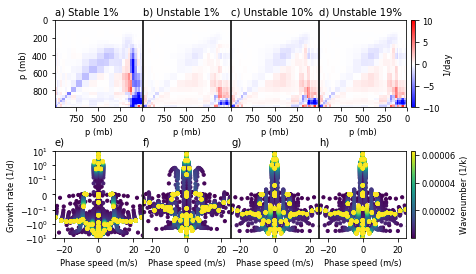

In [6]:
fig = eig_lrf_plot(plot_data)
fig.savefig("figs/figure9.pdf")

# Figure 10

This code was converted from Prof. Pritchard MATLAB's script.  

## Load data in .pkl format

In [7]:
url = 'https://github.com/tbeucler/CBRAIN-CAM/raw/master/notebooks/tbeucler_devlog/PKL_DATA/11_6_GR.pkl'
file = '11_6_GR.pkl'

! [ -e {file} ] || wget {url} .
S = np.load(file, allow_pickle=True)

In [8]:
S

{'Growth_rate_daym1': array([9.88396395e-04, 1.18292708e+00, 7.42700666e-01, 1.00781495e+00,
        5.36887376e-01, 9.67970234e-04, 9.34670756e-04, 5.98735924e-01,
        1.98891788e-01, 6.59497704e-02, 1.17230865e-03, 1.08068611e-03,
        1.10645397e-03]),
 'Perturbation_std': array([0.4  , 0.01 , 0.025, 0.05 , 0.1  , 0.25 , 0.5  , 0.1  , 0.13 ,
        0.16 , 0.19 , 0.22 , 0.25 ])}

## Plot figure

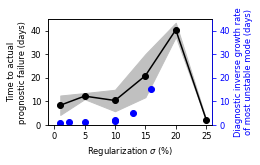

In [13]:
YMAX = 45 # Upper limit for y-axis
Input_reg = np.array([0.01,0.05,0.1,0.15,0.2,0.25])
# Hard-coded table of results from the 4 prognostic tests:
maxstep = np.array([[134,590,446,1499,2044,103], # Orig IC
                  [651,566,332,363,1686,95], # Jan12 IC
                  [512,678,337,840,2011,97], # Jan18 IC
                  [297,504,866,1304,1999,118]]) # Jan24 IC
themean = np.mean(maxstep,axis=0)/48
thestd = np.std(maxstep,axis=0)/48

fig,ax = plt.subplots(figsize=(3.5, 3.5/1.61), constrained_layout=True)
ax2 = ax.twinx()

# Shading goes in the back
ax.fill_between(100*Input_reg,themean-thestd,themean+thestd,color='silver')
ax.plot(100*Input_reg,themean,color='k')
ax.scatter(100*Input_reg,themean,color='k')
ax.set_ylabel('Time to actual\nprognostic failure (days)')
ax.set_xlabel ('Regularization $\sigma$ (%)'); 
ax.set_xlim((-1,26))
ax.set_ylim((0,YMAX))

ax2.scatter(100*S['Perturbation_std'],1/S['Growth_rate_daym1'],color='b')
ax2.set_ylim((0,YMAX))
ax2.set_ylabel('Diagnostic inverse growth rate\nof most unstable mode (days)',color='b')
ax2.spines['right'].set_color('b')
ax2.tick_params(axis='y', colors='b')

plt.savefig('figs/Figure11.pdf', tight=True)

# Figure S1

Same as Figure 2 but for the unstable network

## Load data

In [10]:
NNname = 'UNSTAB'
path = pathPKL+'9_30_Fig2_'+NNname+'.pkl'
hf = open(path,'rb')
S = pickle.load(hf)

FileNotFoundError: [Errno 2] No such file or directory: '/home1/05823/tg851228/SPCAM/CBRAIN-CAM/notebooks/tbeucler_devlog/PKL_DATA/9_30_Fig2_UNSTAB.pkl'

## Plot figure

In [ ]:
X = 0.5*(S['LTSspace'][:-1]+S['LTSspace'][1:])
Y = 0.5*(S['QMspace'][:-1]+S['QMspace'][1:])

option_array = ['Weights','Precip','Pano']

fig, ax = plt.subplots(1,3,figsize=(15,5))

for i,option in enumerate(option_array):
    
    if option=='Weights': C = S['Whist']; vlim=False; tit='Count'; cmaps = 'viridis'
    elif option=='Precip': C = S['PREChist'][NNname]; vlim=True; vmin = -110; vmax = 110; cmaps = 'bwr'; tit='P-E [mm/day]'
    elif option=='Heating': C = S['HEAThist'][NNname]; vlim=True; vmin = -3.5e3; vmax = 3.5e3; cmaps = 'bwr'; tit='Net heating [W/m2]'
    elif option=='Pano': C = S['PREChist'][NNname]-S['PREChist']['truth']; vlim=True; vmin = -11; vmax = 11; cmaps = 'bwr'; tit='P-E error [mm/day]'
    elif option=='Hano': C = S['HEAThist'][NNname]-S['HEAThist']['truth']; vlim=True; vmin = -70; vmax = 70; cmaps = 'bwr'; tit='Heating error [mm/day]'

    ax0 = ax[i]
    if vlim: im = ax0.pcolormesh(X, Y, C, vmin=vmin, vmax=vmax, cmap=cmaps)
    else: im = ax0.pcolormesh(X, Y, C, cmap=cmaps)

    plt.colorbar(im, ax=ax0)
    ax0.set_xlabel('LTS [K]')
    ax0.set_ylabel('QM [mm]')
    ax0.set_title(tit)
    
plt.savefig(pathPDF+'FigureS1.pdf',format='pdf')

# Figure S2: Same as Figure 9 but without input regularization

In [ ]:
# Download appropriate data
!wget -nc https://github.com/tbeucler/CBRAIN-CAM/raw/master/notebooks/tbeucler_devlog/PKL_DATA/8_19_LRF.pkl
#!wget -nc https://github.com/tbeucler/CBRAIN-CAM/raw/master/notebooks/tbeucler_devlog/PKL_DATA/9_13_LRF.pkl
#!wget -nc https://github.com/tbeucler/CBRAIN-CAM/raw/master/notebooks/tbeucler_devlog/PKL_DATA/9_14_LRF.pkl
#!wget -nc https://github.com/tbeucler/CBRAIN-CAM/raw/master/notebooks/tbeucler_devlog/PKL_DATA/9_20_LRF.pkl

# load
data_old = np.load('8_19_LRF.pkl', allow_pickle=True) 

In [ ]:
mpl.rcParams['axes.unicode_minus'] = False

plt.figure(figsize=(15,8))

toplot_nam = ['MeanLRF_stable','MeanLRF_unstable']
toplot_tit = ['Stable (1/day)','Unstable (1/day)']

for i in range(2):
    
    d = data_old
    
    plt.subplot(2,2,i+1)
    plt.imshow(stday*d['linear_response_functions'][toplot_nam[i]]['q']['q'],
               cmap='bwr',vmin=vmin,vmax=vmax)
    plt.colorbar()
    plt.title(toplot_tit[i])
    plt.ylabel('Pressure (hPa)')
    plt.draw()
    # Change y labels to pressure
    labels = [item.get_text() for item in plt.gca().get_yticklabels()]
    for ilab,lab in enumerate(labels):
        IND = min(29,max(0,int(float(lab))))
        labels[ilab]=str('%01.0f'%d['base_state']['p'][IND])
    plt.gca().set_yticklabels(labels)
    # Change x labels to pressure
    labels = [item.get_text() for item in plt.gca().get_xticklabels()]
    for ilab,lab in enumerate(labels):
        IND = min(29,max(0,int(float(lab))))
        labels[ilab]=str('%01.0f'%d['base_state']['p'][IND])
    plt.gca().set_xticklabels(labels)
    
for i in range(2):
    
    d = data_old
    
    plt.subplot(2,2,3+i)
    lrf = {'base_state': d['base_state'], 'jacobian': d['linear_response_functions'][toplot_nam[i]]}
    plot_spectra(lrf)
    plt.xlim([-300, 300])

plt.savefig(pathPDF+'FigureS2.pdf',format='pdf')

# Figure S3: TODO